

>MACHINE LEARNING DIGITAL ASSIGNMENT 5


> 22MCA0394


> ASHISH PATEL

QUESTION 1)     
Develop a fruit classification model using “InceptionV3Net” transfer learning technique and compare the validation performance.
Dataset: https://www.kaggle.com/datasets/moltean/fruits


In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"ashishp2d","key":"9eda0a156a4c146929228c0e20c55d3a"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download moltean/fruits
!unzip fruits

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [ ]:
ls

content/             fruits-360-original-size/  sample_data/
fruits-360_dataset/  fruits.zip


In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image

import pickle
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
datagenerator = {
   "train" : ImageDataGenerator(horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1. / 255,
                                validation_split=0.1,
                                shear_range=0.1,
                                zoom_range=0.1,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rotation_range=30,
                               ).flow_from_directory(directory="/content/fruits-360_dataset/fruits-360/Training",
                                                     target_size=(300, 300),
                                                     subset='training',
                                                    ),
  "valid" : ImageDataGenerator(rescale=1 / 255,
                                validation_split=0.1,
                               ).flow_from_directory(directory="/content/fruits-360_dataset/fruits-360/Test",
                                                     target_size=(300, 300),
                                                     subset='validation',
                                                    ),
}

Found 60955 images belonging to 131 classes.
Found 2209 images belonging to 131 classes.


In [ ]:
import tensorflow as tf
from tensorflow.python.ops.gen_nn_ops import AvgPool

base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(300, 300, 3),
    pooling=AvgPool,
    classes=131,
    classifier_activation="softmax",
)
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dense(131, activation='softmax')
])
opt = optimizers.Adam(learning_rate=0.0001)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 131)               134275    
                                                                 
Total params: 24,035,235
Trainable params: 2,232,451
Non-trainable params: 21,802,784
____________________________________

In [ ]:
# Setting variables for the model
batch_size = 512
epochs = 20

# Seperating Training and Testing Data
train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

In [ ]:
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 119
validation_steps : 4


In [ ]:
history = model.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=valid_generator, validation_steps=validation_steps)

Epoch 1/20
119/119 [==============================] - 97s 732ms/step - loss: 4.3036 - accuracy: 0.1347 - val_loss: 3.3812 - val_accuracy: 0.3516
Epoch 2/20
119/119 [==============================] - 86s 720ms/step - loss: 2.8475 - accuracy: 0.4267 - val_loss: 2.4368 - val_accuracy: 0.4844
Epoch 3/20
119/119 [==============================] - 83s 700ms/step - loss: 1.9300 - accuracy: 0.6121 - val_loss: 1.7063 - val_accuracy: 0.6641
Epoch 4/20
119/119 [==============================] - 85s 710ms/step - loss: 1.4109 - accuracy: 0.7140 - val_loss: 1.2919 - val_accuracy: 0.7188
Epoch 5/20
119/119 [==============================] - 84s 702ms/step - loss: 1.1234 - accuracy: 0.7778 - val_loss: 1.0976 - val_accuracy: 0.7812
Epoch 6/20
119/119 [==============================] - 85s 705ms/step - loss: 0.9043 - accuracy: 0.8201 - val_loss: 0.9355 - val_accuracy: 0.8125
Epoch 7/20
119/119 [==============================] - 88s 737ms/step - loss: 0.7787 - accuracy: 0.8493 - val_loss: 0.8500 - val_ac

In [ ]:
# Evaluate the model
test_dir = '/content/fruits-360_dataset/fruits-360/Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print(f'Test accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

Found 22688 images belonging to 131 classes.
44/44 [==============================] - 125s 2s/step - loss: 0.4717 - accuracy: 0.8842
Test accuracy: 0.8842329382896423
Test Loss: 0.47174298763275146


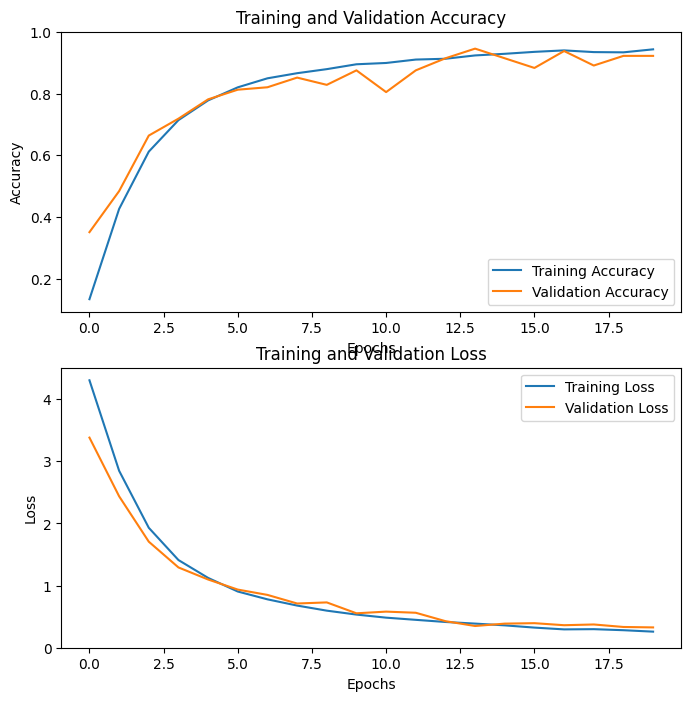

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()